<a href="https://colab.research.google.com/github/TharinsaMudalige/Simple_Classification_for_Bank_Marketing_Dataset/blob/main/Machine_Learning_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/ML Coursework/bank-additional-full.csv'

# Loading the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path, delimiter=';')
# Displaying the first few rows
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
print("Initial dataset shape:", data.shape)

Initial dataset shape: (41188, 21)


Data Preprocessing

1.   Handling "unknown values"

In [ ]:
# Columns containing unknown values
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Handling "unknown" values
for column in columns:
    unknown_count = data[column].value_counts().get('unknown', 0)
    print(f'"unknown" count in {column} column: {unknown_count}')

    if column in ['default', 'education']:  # Taking "unknown" as a separate category for these 2 columns
        data[column] = data[column].replace('unknown', 'unknown')
    else:  # Replacing "unknown" with the mode for other columns
        data[column] = data[column].replace('unknown', data[column].mode()[0])

"unknown" count in job column: 330
"unknown" count in marital column: 80
"unknown" count in education column: 1731
"unknown" count in default column: 8597
"unknown" count in housing column: 990
"unknown" count in loan column: 990


2. Handling the value of pdays

In [ ]:
# Replacing 999 with -1 as "not contacted"
data['pdays'] = data['pdays'].replace(999, -1)

3. Handling duplicate rows

In [ ]:
# Removing duplicate rows
data = data.drop_duplicates()

In [ ]:
print("Dataset shape after remvoving duplicates:", data.shape)

Dataset shape after remvoving duplicates: (41176, 21)


4. Encoding categorical variables

In [ ]:
print("Dataset before encoding:")
print(data.info())

Dataset before encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.i

In [ ]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome']

# One-hot encoding for all the categorical variables/features
data_encoded = pd.get_dummies(data, columns=columns, drop_first=True)

print("\nDataset after encoding:")
print(data_encoded.info())


Dataset after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   pdays                          41176 non-null  int64  
 4   previous                       41176 non-null  int64  
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  y                              41176 non-null  object 
 11  job_blue-collar                41176 non-null  bool   
 12  job_entrepreneur          

5. Standardization (Z-Score Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_columns = ['age', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed']

# To standardize features to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()

# Creating a copy of the dataset
X_standardized = data_encoded.copy()
X_standardized[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

6. Mapping yes and no as 0 and 1

In [ ]:
# Mapping the target variable 'y' to 1 and 0
X_standardized['y'] = X_standardized['y'].map({'yes': 1, 'no': 0})

print("After mapping:", X_standardized['y'].unique())

After mapping: [0 1]


7. Removing the "duration" feature

In [ ]:
# Removing the 'duration' feature
X_standardized = X_standardized.drop(columns=['duration'])

print("Dataset shape after removing 'duration':", X_standardized.shape)

Dataset shape after removing 'duration': (41176, 49)


8. Handling class imbalance

In [ ]:
# Checking whether imbalance exists

# Checking how the classes are distributed
class_distribution = X_standardized['y'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Calculating the percentage of imbalance
percentage_of_no = (class_distribution[0] / len(X_standardized)) * 100
percentage_of_yes = (class_distribution[1] / len(X_standardized)) * 100
print(f"\nPercentage of 'no': {percentage_of_no:.2f}%")
print(f"Percentage of 'yes': {percentage_of_yes:.2f}%")

Class Distribution:
y
0    36537
1     4639
Name: count, dtype: int64

Percentage of 'no': 88.73%
Percentage of 'yes': 11.27%


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Separating features and target variable
X = X_standardized.drop('y', axis=1)
y = X_standardized['y']

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(Counter(y_smote))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Class distribution after SMOTE:
Counter({0: 36537, 1: 36537})


In [ ]:
# Combining the features (X_smote) and target variable (y_smote) into a single dataset
smote_balanced_data = X_smote.copy()
smote_balanced_data['y'] = y_smote

# Saving the pre processed dataset
file_path = '/content/drive/My Drive/ML Coursework/bank_additional_full_preprocessed.csv'
smote_balanced_data.to_csv(file_path, index=False)

9. Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the saved dataset
file_path = '/content/drive/My Drive/ML Coursework/bank_additional_full_preprocessed.csv'
data_smote = pd.read_csv(file_path)

X = data_smote.drop('y', axis=1)
y = data_smote['y']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Checking the count of each class in the both sets
print("\nTraining set:")
print(Counter(y_train))

print("\nTesting set:")
print(Counter(y_test))


Training set:
Counter({1: 29230, 0: 29229})

Testing set:
Counter({0: 7308, 1: 7307})


Building the neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [ ]:
# Building the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7432 - loss: 0.5236 - val_accuracy: 0.8029 - val_loss: 0.4256
Epoch 2/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7958 - loss: 0.4375 - val_accuracy: 0.8141 - val_loss: 0.4123
Epoch 3/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8109 - loss: 0.4087 - val_accuracy: 0.8223 - val_loss: 0.3854
Epoch 4/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8182 - loss: 0.3885 - val_accuracy: 0.8292 - val_loss: 0.3740
Epoch 5/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8250 - loss: 0.3780 - val_accuracy: 0.8378 - val_loss: 0.3564
Epoch 6/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8336 - loss: 0.3607 - val_accuracy: 0.8431 - val_loss: 0.3515
Epoch 7/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8398 - loss: 0.3478 - val_accuracy: 0.8428 - val_loss: 0.3456
Epoch 8/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8456 - 

Evaluating the neural network model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.2751

Test Accuracy: 90.08%
Test Loss: 0.2776


Classification report for the neural network

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Class 0 (No)', 'Class 1 (Yes)'])
print("\nClassification Report:")
print(report)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(matrix)

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

 Class 0 (No)       0.90      0.90      0.90      7308
Class 1 (Yes)       0.90      0.90      0.90      7307

     accuracy                           0.90     14615
    macro avg       0.90      0.90      0.90     14615
 weighted avg       0.90      0.90      0.90     14615


Confusion Matrix:
[[6566  742]
 [ 708 6599]]


Plotting training and validation accuracy and loss trends

In [ ]:
import matplotlib.pyplot as plt

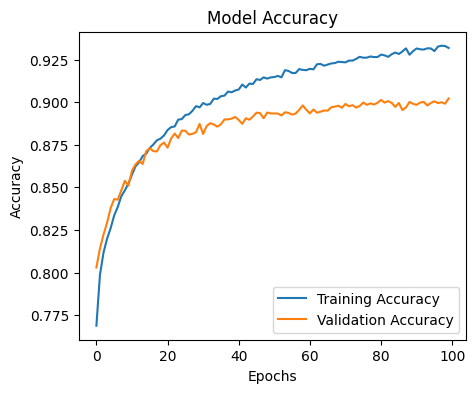

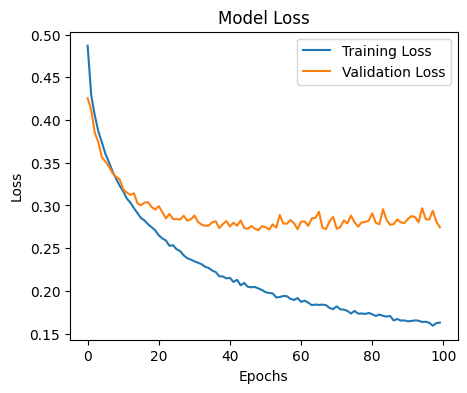

In [ ]:
# Accuracy
plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Confusion matrix for the neural network

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


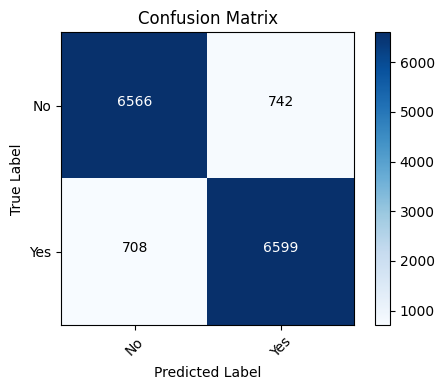

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

matrix = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}", horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

class_names = ['No', 'Yes']

plot_confusion_matrix(matrix, classes=class_names, title='Confusion Matrix')
plt.show()

ROC curve for the neural network

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


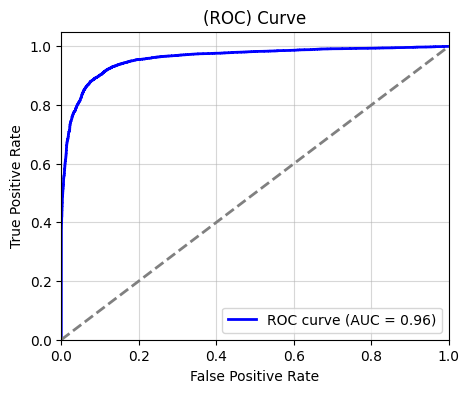

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()

Building the random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Building the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
)

In [ ]:
# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating the random forest model

In [ ]:
y_pred = rf_model.predict(X_test)

# Calculating the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 93.93%


Classification report for the random forest model

In [ ]:
y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.93      0.94      7308
         Yes       0.93      0.94      0.94      7307

    accuracy                           0.94     14615
   macro avg       0.94      0.94      0.94     14615
weighted avg       0.94      0.94      0.94     14615



Plotting the confusion matrix for the random forest model

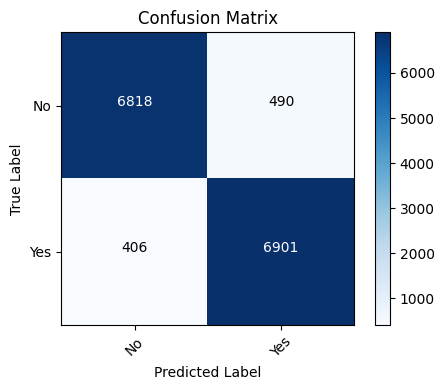

In [ ]:
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}", horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

class_names = ['No', 'Yes']

plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix')
plt.show()

ROC curve for the random forest model

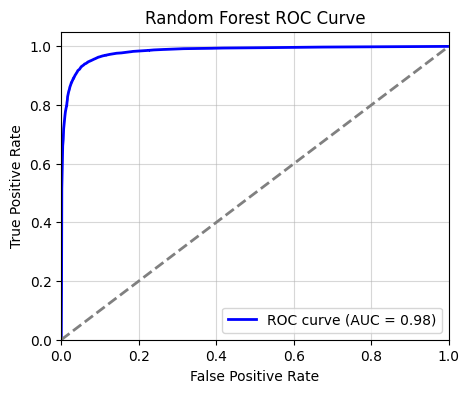

In [ ]:
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()